# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


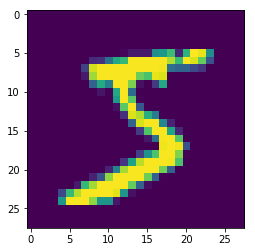

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(10, 3,3, activation='relu'))
model.add(Convolution2D(10, 3, 3))
#model.add(Convolution2D(10, 1, 1))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` c

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        2890      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        2912      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=40, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/40
60000/60000 [==============================] - 66s 1ms/step - loss: 0.3451 - acc: 0.8889
Epoch 2/40
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1077 - acc: 0.9659
Epoch 3/40
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0867 - acc: 0.9735
Epoch 4/40
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0739 - acc: 0.9771
Epoch 5/40
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0692 - acc: 0.9788
Epoch 6/40
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0623 - acc: 0.9804
Epoch 7/40
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0587 - acc: 0.9817
Epoch 8/40
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0550 - acc: 0.9829
Epoch 9/40
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0537 - acc: 0.9832
Epoch 10/40
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0492 - acc: 0.9853

In [14]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=40, verbose=1)

Epoch 1/40
  160/60000 [..............................] - ETA: 1:00 - loss: 0.0835 - acc: 0.9938

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 61s 1ms/step - loss: 0.0312 - acc: 0.9904
Epoch 2/40
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0332 - acc: 0.9894
Epoch 3/40
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0303 - acc: 0.9907
Epoch 4/40
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0299 - acc: 0.9905
Epoch 5/40
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0320 - acc: 0.9897
Epoch 6/40
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0307 - acc: 0.9904
Epoch 7/40
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0294 - acc: 0.9905
Epoch 8/40
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0291 - acc: 0.9906
Epoch 9/40
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0284 - acc: 0.9907
Epoch 10/40
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0290 - acc: 0.9910
Epoch 11/4

In [17]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=30, verbose=1)

Epoch 1/30
  320/60000 [..............................] - ETA: 36s - loss: 0.0250 - acc: 0.9938

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 34s 565us/step - loss: 0.0204 - acc: 0.9934
Epoch 2/30
60000/60000 [==============================] - 33s 552us/step - loss: 0.0198 - acc: 0.9936
Epoch 3/30
60000/60000 [==============================] - 33s 545us/step - loss: 0.0208 - acc: 0.9936
Epoch 4/30
60000/60000 [==============================] - 33s 544us/step - loss: 0.0190 - acc: 0.9939
Epoch 5/30
60000/60000 [==============================] - 32s 539us/step - loss: 0.0195 - acc: 0.9937
Epoch 6/30
60000/60000 [==============================] - 32s 537us/step - loss: 0.0194 - acc: 0.9937
Epoch 7/30
60000/60000 [==============================] - 32s 537us/step - loss: 0.0206 - acc: 0.9932
Epoch 8/30
60000/60000 [==============================] - 32s 538us/step - loss: 0.0197 - acc: 0.9937
Epoch 9/30
60000/60000 [==============================] - 32s 537us/step - loss: 0.0195 - acc: 0.9933
Epoch 10/30
60000/60000 [==============================] - 32s 537us/step - loss: 0.0189 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [19]:
print(score)

[0.0220623857873783, 0.9941]


In [0]:
y_pred = model.predict(X_test)

In [21]:
print(y_pred[:9])
print(y_test[:9])

[[4.17052867e-14 2.51604121e-07 4.37538375e-07 1.10407058e-07
  2.17173252e-07 7.50519438e-11 9.47665226e-16 9.99998927e-01
  1.44165097e-10 4.48253736e-08]
 [2.02669710e-07 8.66815972e-04 9.99130309e-01 1.80152032e-10
  8.80264736e-07 1.07009346e-09 1.45415342e-07 1.75885896e-06
  6.08237349e-11 6.23339158e-09]
 [8.26838320e-10 9.99986768e-01 1.25494131e-08 7.96434529e-10
  1.86888553e-06 5.70269059e-08 1.91277234e-08 1.08549639e-05
  8.35789749e-08 3.50365099e-07]
 [9.99984145e-01 1.60288102e-12 3.99607858e-09 1.03412297e-07
  3.18395932e-09 4.14327872e-07 1.46742941e-05 8.10013556e-10
  5.03942942e-07 1.43970411e-07]
 [2.49949343e-15 4.73962189e-12 2.06946527e-09 2.29727173e-15
  1.00000000e+00 2.52150812e-13 1.04954399e-10 2.47563547e-09
  2.77460884e-11 3.81458776e-08]
 [1.18108079e-09 9.99982119e-01 3.73837921e-08 1.99738948e-10
  4.52051927e-06 1.62639715e-08 1.62201044e-08 1.24718572e-05
  8.12617102e-08 8.10013148e-07]
 [8.21952451e-10 4.56194994e-06 3.17192530e-07 2.28630732e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

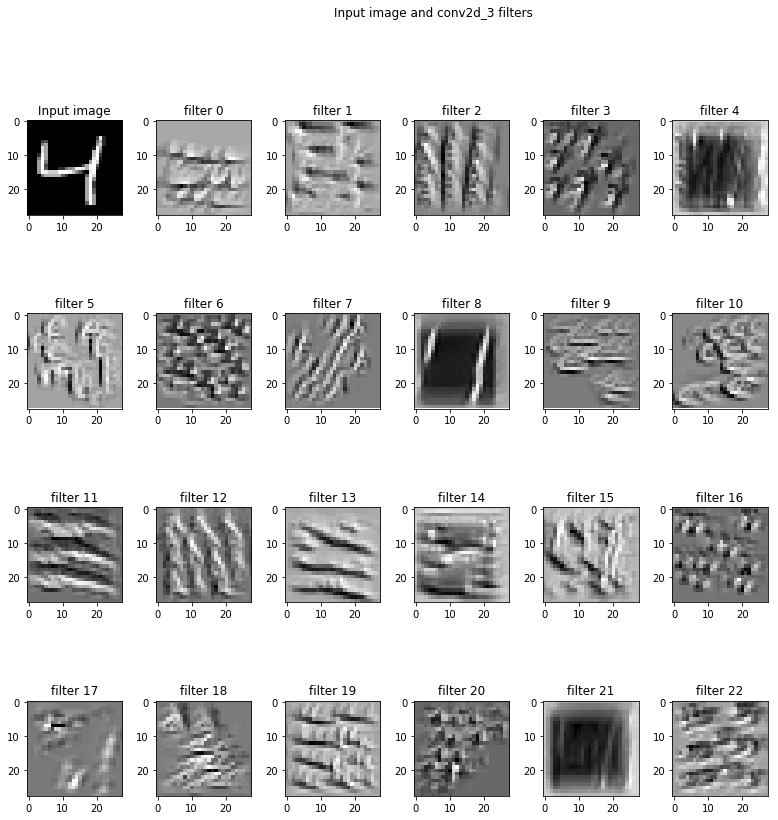

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()